In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import pickle
import time



In [2]:
f0_lst  = []
f1_lst = []
BER_lst = []
x_lst = []
label_lst = []

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import beta
#### I have to code the true values and theoreticals. 

# Define dx and x range
dx = 0.001
x = np.arange(-10, 10 + dx, dx)

# Define the normal distributions
f0 = beta.pdf(x, a=2, b=5)
f1 = beta.pdf(x, a=5, b=2)

# Calculate the minimum of f0 and f1
min_f0_f1 = np.minimum(f0, f1)
# Calculate BER as 0.5 * sum(min(f0, f1) * dx)
BER = 0.5 * np.nansum(min_f0_f1 * dx)

f0_lst.append(f0)
f1_lst.append(f1)
BER_lst.append(BER)
x_lst.append(x)
label_lst.append(['B(2,5)', 'B(5,2)'])


BER



0.10937546875016925

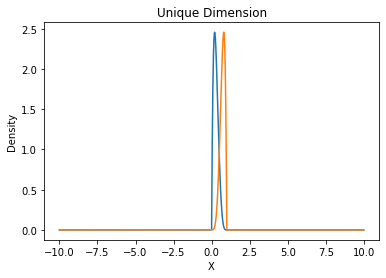

In [4]:
plt.plot(x, f0)
plt.plot(x, f1)
plt.title("Unique Dimension")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()

In [5]:
import numpy as np
# import matplotlib.pyplot as plt
# from scipy.stats import norm
from scipy.stats import uniform
#### I have to code the true values and theoreticals. 

# Define dx and x range
dx = 0.001
x = np.arange(-5, 5 + dx, dx)

# Define the two uniform distributions
pd0 = uniform(loc=0, scale=1)  # lower=0, upper=1
pd1 = uniform(loc=0.8, scale=1)  # lower=0.8, upper=1.8

# Compute the pdfs for both distributions over the x range
f0 = pd0.pdf(x)
f1 = pd1.pdf(x)
# Calculate the minimum of f0 and f1
min_f0_f1 = np.minimum(f0, f1)
# Calculate BER as 0.5 * sum(min(f0, f1) * dx)
BER = 0.5 * np.nansum(min_f0_f1 * dx)
x_lst.append(x)


f0_lst.append(f0)
f1_lst.append(f1)
BER_lst.append(BER)
label_lst.append(['U(0,1)', 'U(.8,1.8)'])


BER


0.10000000000000003

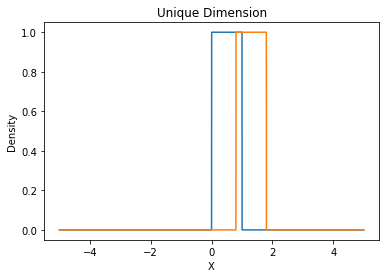

In [6]:
plt.plot(x, f0)
plt.plot(x, f1)
plt.title("Unique Dimension")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()

In [7]:

from scipy.stats import norm
from scipy.stats import beta
#### I have to code the true values and theoreticals. 

# Define dx and x range
dx = 0.001
x = np.arange(-10, 10 + dx, dx)

# Define the normal distributions
f0 = norm.pdf(x, loc=0, scale=1)
f1 = beta.pdf(x, a=20, b=20)

# Calculate the minimum of f0 and f1
min_f0_f1 = np.minimum(f0, f1)
# Calculate BER as 0.5 * sum(min(f0, f1) * dx)
BER = 0.5 * np.sum(min_f0_f1 * dx)

f0_lst.append(f0)
f1_lst.append(f1)
BER_lst.append(BER)
x_lst.append(x)
label_lst.append(['N(0,1)', 'B(20,20)'])


BER


0.0726617598018901

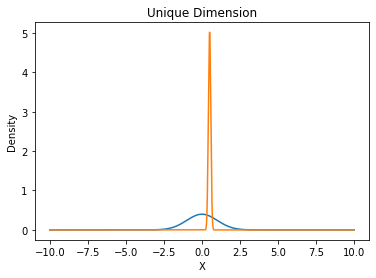

In [8]:
plt.plot(x, f0)
plt.plot(x, f1)
plt.title("Unique Dimension")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()

In [9]:
import numpy as np
# import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import uniform
#### I have to code the true values and theoreticals. 

# Define dx and x range
dx = 0.001
x = np.arange(-10, 10 + dx, dx)

# Define the normal distributions
f0 = norm.pdf(x, loc=0, scale=1) ## this might be wonk
pd1 = uniform(loc=0.5, scale=2.5)  #0 to 3
f1 = pd1.pdf(x)

# Calculate the minimum of f0 and f1
min_f0_f1 = np.minimum(f0, f1)
# Calculate BER as 0.5 * sum(min(f0, f1) * dx)
BER = 0.5 * np.nansum(min_f0_f1 * dx)

f0_lst.append(f0)
f1_lst.append(f1)
BER_lst.append(BER)
x_lst.append(x)
label_lst.append(['N(0,1)', 'U(0.5,3)'])


BER


0.15350691875939732

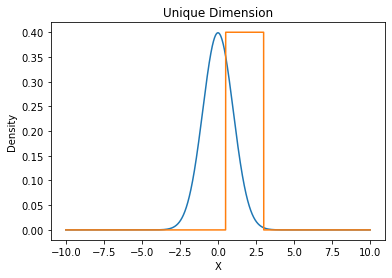

In [10]:
plt.plot(x, f0)
plt.plot(x, f1)
plt.title("Unique Dimension")
plt.xlabel("X")
plt.ylabel("Density")
plt.show()

In [11]:
a, b = label_lst[0]

b

'B(5,2)'

In [12]:
def dp_func(f0, f1, rnd= 2):
    p = 0.5
    q = 0.5
    pf0 = p * f0
    qf1 = q * f1
    # Calculate the function
    func = (pf0 - qf1)**2 / (pf0 + qf1)

    # Calculate dp using numerical integration (sum and dx)
    dp = np.nansum(func) * dx

    # Calculate upper and lower bounds
    upper = 0.5 - 0.5 * dp
    lower = 0.5 - 0.5 * np.sqrt(dp)
    
    print(lower, upper)
    
    lower= round(lower, rnd)
    upper = round(upper, rnd)

    
    theory_Dp = [lower, upper]
    return theory_Dp

def bha_func(f0, f1, rnd=2):
    func2 = np.sqrt(f0 * f1)
    # Calculate BC using numerical integration (sum and dx)
    BC = np.nansum(func2) * dx

    lower = 0.5 - 0.5 * np.sqrt(1 - BC**2)
    upper = 0.5 * BC

    print(lower, upper)

    lower= round(lower, rnd)
    upper = round(upper, rnd)

    
    
    theory_bha = [lower, upper]
    return theory_bha


0.10937546875016925
0.08624246330070995 0.15760940164907128
0.05609086943364505 0.23009711819104303


0.10000000000000003
0.05278640450004207 0.09999999999999998
0.010102051443364402 0.1


0.0726617598018901
0.06292977858379983 0.11793924310238751
0.03485867139797694 0.18342176650099296


0.15350691875939732
0.11498553211861606 0.20352771904402955
0.06364160974787597 0.2441134065482169




/tmp/ipykernel_18755/71031870.py:7: RuntimeWarning: invalid value encountered in divide
  func = (pf0 - qf1)**2 / (pf0 + qf1)
/tmp/ipykernel_18755/71031870.py:7: RuntimeWarning: invalid value encountered in divide
  func = (pf0 - qf1)**2 / (pf0 + qf1)


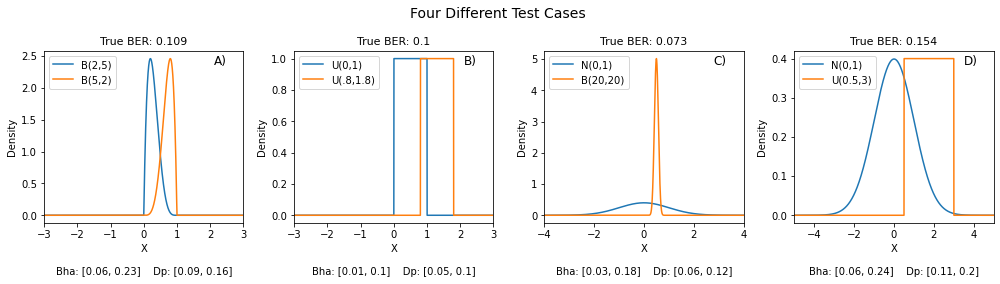

In [13]:
fs = 10

# Define the ranges of x for the four subplots
x_ranges = [(-3, 3),  (-3,3 ),(-4, 4), (-5, 5)]

fig, axs = plt.subplots(nrows =1, ncols=4, figsize=(14, 4), layout= 'tight')

# Iterate over the subplots and plot the corresponding data
for i, ax in enumerate(axs.flat):
    
    x_min, x_max = x_ranges[i]
    l1, l2 = label_lst[i]
    
    
    BER = BER_lst[i]
    f0 = f0_lst[i]
    f1 = f1_lst[i]
    x=  x_lst[i]
    
    print(BER)
    Dp_l, Dp_u = dp_func(f0,f1)
    Bha_l, Bha_u = bha_func(f0,f1)
    print("\n")

    
    ax.plot(x, f0, label  = l1)
    ax.plot(x, f1, label = l2)

    ax.set_xlim((x_min, x_max))
#     ax.set_ylim((0,3))

    ax.set_title(f"True BER: {round(BER, 3)}", fontsize = fs+1)
    
    ### the text I want to add
#     ax.set_title(f"BER: {round(BER, 2)} Bha:[{Bha_l}, {Bha_u}] Dp: [{Dp_l},, {Dp_u}]", fontsize = fs)
    ax.text(0.5, -0.3, f"Bha: [{Bha_l}, {Bha_u}]    Dp: [{Dp_l}, {Dp_u}]", 
            transform=ax.transAxes, fontsize=fs, ha='center')
   
    ax.set_xlabel("X", fontsize = fs)
    ax.set_ylabel("Density", fontsize= fs)
    
    ax.legend(loc= "upper left")

# Add letters to reference the plots
letters = ['A)', 'B)', 'C)', 'D)']
for i, ax in enumerate(axs.flat):
    ax.text(0.85, 0.9, letters[i], transform=ax.transAxes, fontsize=fs+2, va='bottom')
    
fig.suptitle("Four Different Test Cases ", fontsize=fs+4)

file_name = r"images/four_cases.png"
plt.savefig(file_name,facecolor=(1,1,1,1),  bbox_inches='tight', dpi= 300)
plt.show()